## Intensity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
from collections import OrderedDict
import pandas as pd

In [2]:
def make_html_audio(ys, sr, width=100):
    clips = []
    for y in ys:
        audio = ipd.Audio(y, rate=sr)
        audio_html = audio._repr_html_().replace('\n', '').strip()
        audio_html = audio_html.replace('<audio ', '<audio style="width: {}px; "'.format(width))
        clips.append(audio_html)
    return clips

In [3]:
sr = 8000
t = np.arange(sr)/sr
y = np.cos(2*np.pi*440*t)

In [10]:
ys = []
facs = np.arange(1, 25)
facs_str = []
for fac in facs:
    y2 = y/fac
    y2[0] = 1
    ys.append(y2)
    facs_str.append("$1/%i$"%fac)
clips = make_html_audio(ys, sr)
print(len(clips))
df = pd.DataFrame(OrderedDict([("Sinusoids", clips)]))
fout = open("out.html", "w")
s = df.to_html()
s = s.replace("&lt;", "<")
s = s.replace("&gt;", ">")
s = s.replace("\n", "")
fout.write(s)
fout.close()

24


132300


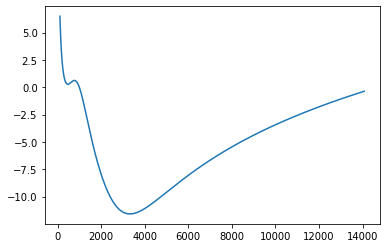

In [26]:
sr = 44100
freq_range = 110*2**(np.linspace(0, 7, sr*3))
freq = 1000
# Code from https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S3_Dynamics.html
h_freq = ((1037918.48 - freq**2)**2 + 1080768.16 * freq**2) / ((9837328 - freq**2)**2 + 11723776 * freq**2)
n_freq = (freq / (6.8966888496476 * 10**(-5))) * np.sqrt(h_freq / ((freq**2 + 79919.29) * (freq**2 + 1345600)))
h_freq_range = ((1037918.48 - freq_range**2)**2 + 1080768.16 * freq_range**2) / ((9837328 - freq_range**2)**2
                                                                                 + 11723776 * freq_range**2)
n_freq_range = (freq_range / (6.8966888496476 * 10**(-5))) * np.sqrt(h_freq_range / ((freq_range**2 + 79919.29) *
                                                                     (freq_range**2 + 1345600)))
equal_loudness_contour = 20 * np.log10(np.abs(n_freq / n_freq_range))

plt.plot(freq_range, equal_loudness_contour)

print(equal_loudness_contour.size)

## Tchaikovsky's 6th Symphony: The March

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


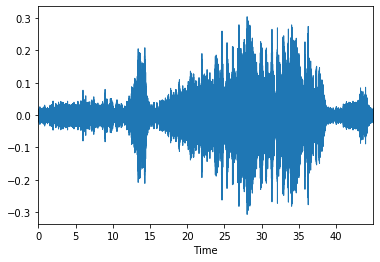

In [5]:
x, sr = librosa.load("tchaik.mp3")
librosa.display.waveplot(x)